In [3]:
%jsroot off
TString FileName1 = "./simulations/0.root";
TString FileName2 = "./simulations/10.root";
TString FileName3 = "./simulations/20.root";
TString FileName4 = "./simulations/30.root";
TString FileName5 = "./simulations/40.root";
TString FileName6 = "./simulations/50.root";
TString FileName7 = "./simulations/60.root";

TFile *deg0  = TFile::Open(FileName1);
TFile *deg10  = TFile::Open(FileName2);
TFile *deg20  = TFile::Open(FileName3);
TFile *deg30  = TFile::Open(FileName4);
TFile *deg40  = TFile::Open(FileName5);
TFile *deg50  = TFile::Open(FileName6);
TFile *deg60  = TFile::Open(FileName7);

TTree *Tdeg0  = (TTree*) deg0  -> Get("T");
TTree *Tdeg10  = (TTree*) deg10  -> Get("T");
TTree *Tdeg20  = (TTree*) deg20  -> Get("T");
TTree *Tdeg30  = (TTree*) deg30  -> Get("T");
TTree *Tdeg40  = (TTree*) deg40  -> Get("T");
TTree *Tdeg50  = (TTree*) deg50  -> Get("T");
TTree *Tdeg60  = (TTree*) deg60  -> Get("T");

int NEntries [7];

NEntries[0] = Tdeg0 -> GetEntries();
NEntries[1] = Tdeg10 -> GetEntries();
NEntries[2] = Tdeg20 -> GetEntries();
NEntries[3] = Tdeg30 -> GetEntries();
NEntries[4] = Tdeg40 -> GetEntries();
NEntries[5] = Tdeg50 -> GetEntries();
NEntries[6] = Tdeg60 -> GetEntries();


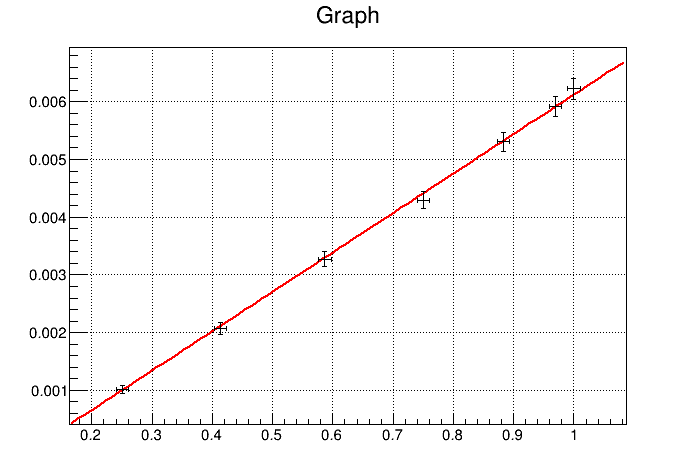

 FCN=1.00663 FROM MIGRAD    STATUS=CONVERGED      48 CALLS          49 TOTAL
                     EDM=3.79018e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -7.21684e-04   1.23024e-04   3.72935e-08   2.19864e+00
   2  p1           6.83159e-03   1.95635e-04   5.93121e-08  -2.74585e-02


In [4]:

int NTot = 200000;


double ThetaDeg[7] = {0., 10., 20., 30., 40., 50., 60.};


double cosTheta[7];
double dcosTheta[7] = {0.01,0.01,0.01,0.01,0.01,0.01,0.01};
double flux[7];
double dflux[7];

for(int i = 0; i < 7; ++i)
{
    flux[i] = ((double) NEntries[i])/((double) NTot);
    dflux[i] = TMath::Sqrt(NEntries[i])/NTot;
    cosTheta[i] = pow(TMath::Cos(ThetaDeg[i] * TMath::Pi() / 180.),2);
}


TGraphErrors *gr = new TGraphErrors(7, cosTheta, flux,dcosTheta, dflux);
TCanvas *c1 = new TCanvas();
gr -> Draw("AP");

TF1 *f1 = new TF1("f1", "[0] + [1]*x", 0 ,1);
//f1->SetParameter(1,0.008);
f1->SetParameter(1,0.008);

gr -> Fit(f1);
gPad -> SetGrid();

c1->Draw();
